# Sergei Moneyschenko

This notebook covers my attempt at putting together Prompt engineering, Data Science & cryptocurrency algorithmic trading to learn about optimal trading strategies

# Looking at potential trading margins

The gains of a potential speculative strategy are studied by plotting 2 pairs

- `BTC/USD`
- `CRO/USD`

It's a simple "buy low and sell high" trading strategy only using these 2 instruments. I visualise what my potential margins are by plotting the % price change of the two on the same timeseries whilst highlighting filling only the areas where one offsets against the other. In layman terms: the coloured areas are the moments where we can make money

[*********************100%%**********************]  2 of 2 completed


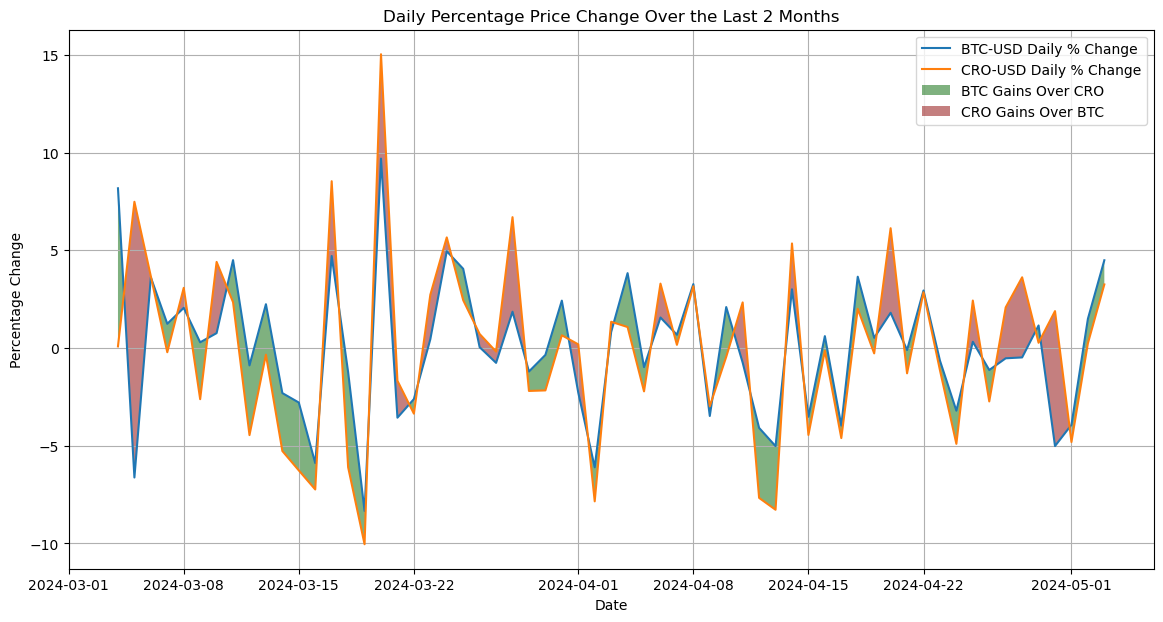

In [4]:
%run scripts/daily_change.py

# Putting it to the test

The visualisation shows me that there's room for margins, however. How will this behave in the wild?

I create a simple strategy with some rules:

- On every tick, we compute the percentual change of both instruments vs the day before
- if the change of one is greater than the other. e,g: BTC became more expensive than CRO
- We buy CRO with BTC
- We rinse & repeat

[*********************100%%**********************]  2 of 2 completed


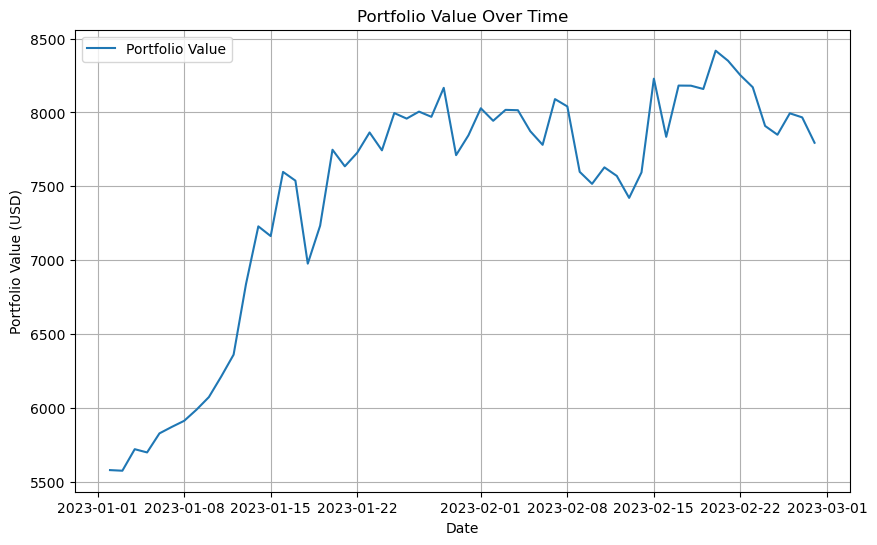

In [13]:
%run scripts/basic_speculation.py

# Measuring different strategies

Now that a foundation is set, I can draw N strategies on the canvas to measure how different approaches increase my portfolio value. A proposed problem for ML to solve would be to:

- Optimise the parameters to find the best strategy
- Optimise the parameters to find the best instruments
- Optimise the parameters to find the best trading frequency

 🌟 The outcome is to have the highest portfolio value which makes it very simple

[*********************100%%**********************]  2 of 2 completed


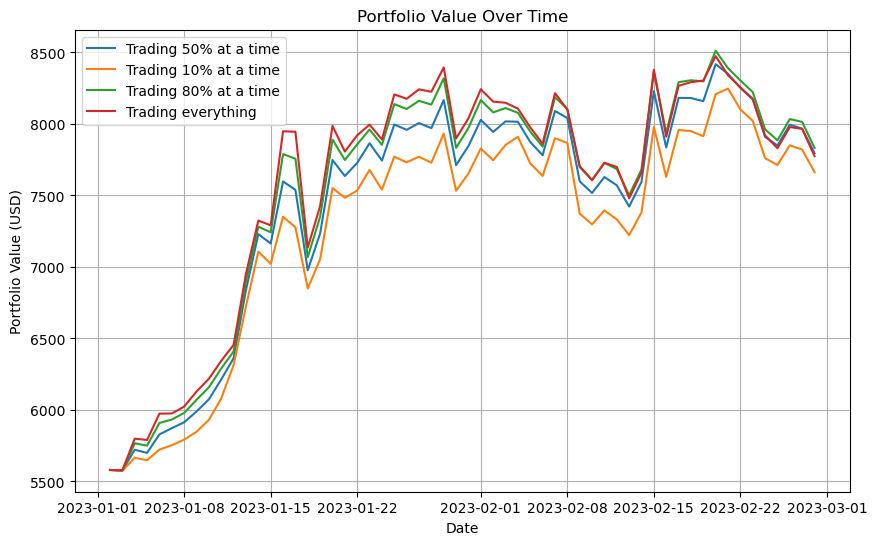

In [24]:
%run scripts/multi_strategy_speculation.py

# A practical example, measuring strategies

`BTC` & `CRO` aren't the only 2 instruments on the market. What if we grabbed another pair? I went for `TSLA` and `PYPL`

We can also mix and match

[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


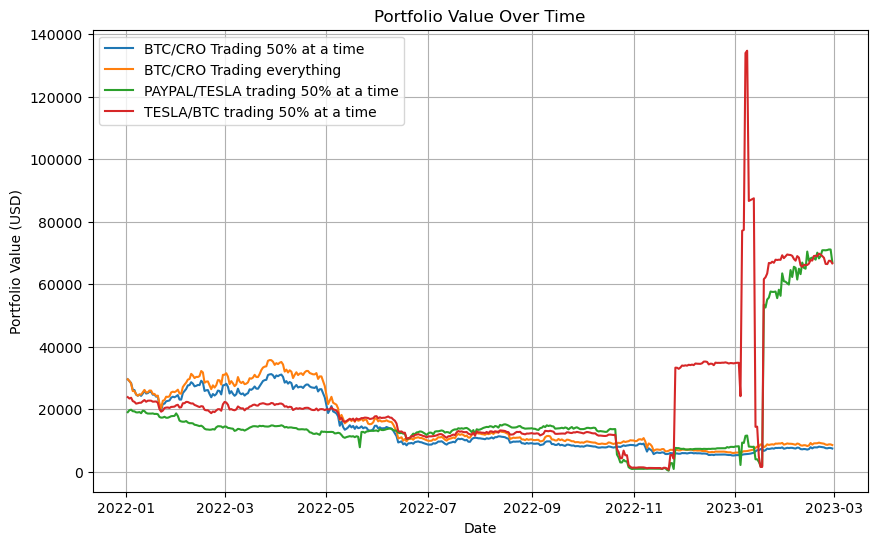

In [1]:
%run scripts/multi_instrument_multi_strategy.py

# Programmatically finding the best pair to trade

A successful gain occurs when we "flip" twice and the price variation was always on our side.

Using historical data we can look at every single possible combination of financial instruments that over the last 1 year yield the maximum gains

We can then rank them and come up with a top 3 or 5. The algorithm to find this pair is very simple

- Take all financial instruments and iterate over each one
- Inside that loop, iterate again over each one
- Now we have *any* financial instrument pair available on scope
- For each pair, with historical data to a year, count the number of instances where
  - Any 2 trades yielded a gain. Said percentual gain can be computed numerically
  - This new value becomes a ranking criteria to sort by as our new data structure is a pair made up of 2 instruments
 
I'll come up with the top pairs of instruments to trade. The script can be found here. It must be run on the background due to its data size

```
scripts/top_pairs_to_trade.py
```

In [2]:
import pandas as pd

# Load CSV file into DataFrame
df = pd.read_csv('data/selected_pairs.csv')

df

,pair,score
0,AISP / AULT,2047.352423
1,AULT / AISP,2047.352423
2,WTO / SBFM,1995.649214
3,FET-USD / AXL17799-USD,1323.654462
4,AXL17799-USD / FET-USD,1323.654462
...,...,...
439,JTAIZ / GCTS,4489.530701
440,JAGX / JTAIZ,4426.418104
441,CFG-USD / FTT-USD,1721.783582
442,FTT-USD / CFG-USD,1721.783582


# Scoring combinations

We now have a list with ~450 entries of stock pairs.

The **score** is the absolute value of each days percentual price change aggregation difference between the 2. This way we can see who has the most gains. Let's try to see how a pair of these fairs on my previous simulation

Here we trade `CXAI` and `ZETA-USD`

[*********************100%%**********************]  2 of 2 completed
/Users/xyzxyz/dev/sergei_moneysevich/scripts/daily_change_top.py:12: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  percent_changes = data['Close'].pct_change() * 100


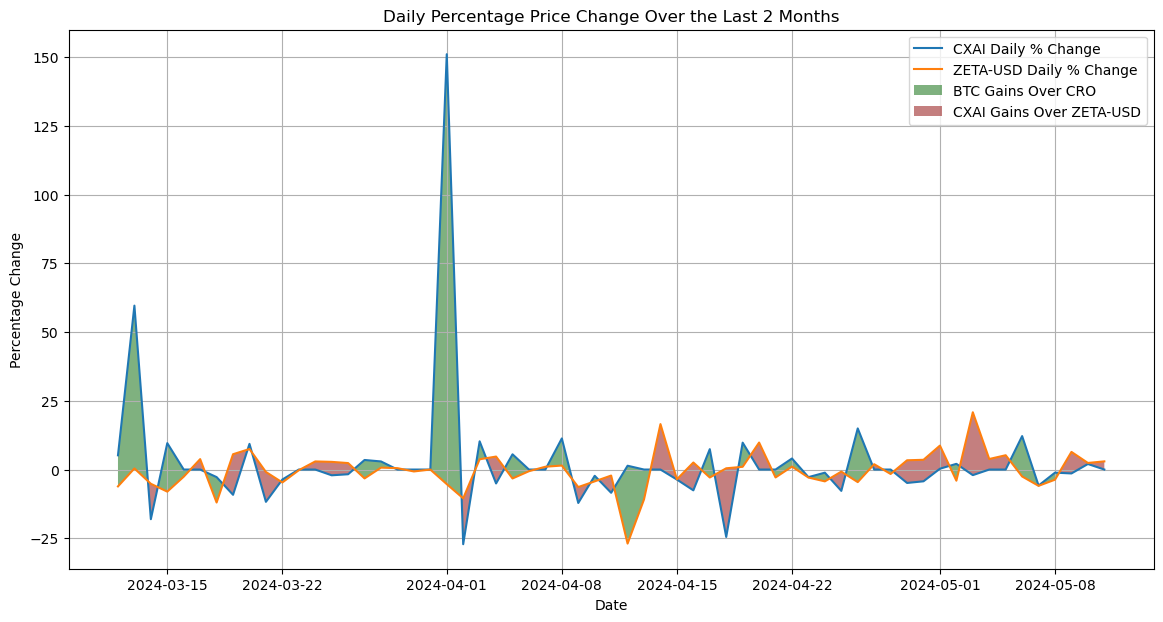

In [8]:
%run scripts/daily_change_top.py

# Findings

It looks like trading shitcoins is the best way to speculate into being rich. 

Obviously this is a very young study so more adaptations need to be made.

bingo! Looks like the money doubles when traded over the last 2 months

[*********************100%%**********************]  2 of 2 completed


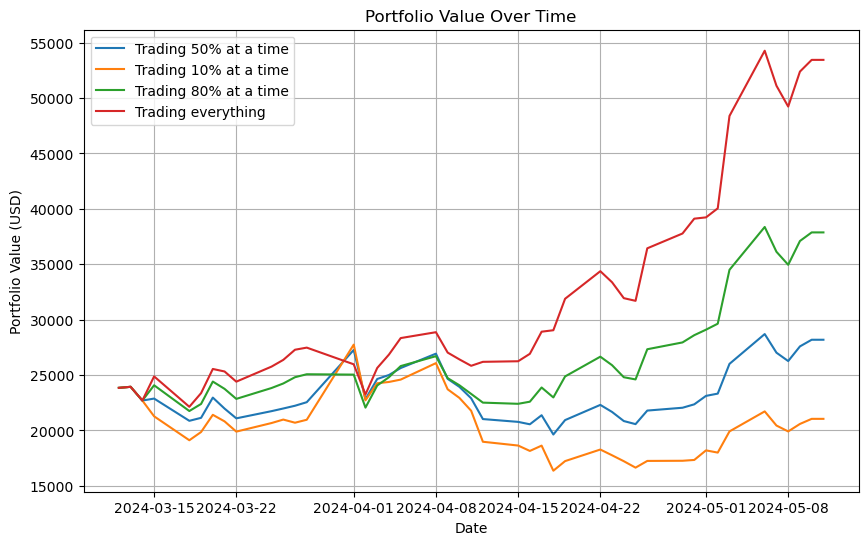

In [14]:
%run scripts/top_multi_strategy_speculation.py